<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tic-Toc-Toe-environment" data-toc-modified-id="Tic-Toc-Toe-environment-1">Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#Initialization-and-attributes" data-toc-modified-id="Initialization-and-attributes-1.1">Initialization and attributes</a></span></li><li><span><a href="#Taking-actions" data-toc-modified-id="Taking-actions-1.2">Taking actions</a></span></li><li><span><a href="#Reward" data-toc-modified-id="Reward-1.3">Reward</a></span></li></ul></li><li><span><a href="#Optimal-policy-for-Tic-Toc-Toe-environment" data-toc-modified-id="Optimal-policy-for-Tic-Toc-Toe-environment-2">Optimal policy for Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#An-example-of-optimal-player-playing-against-random-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-random-player-2.1">An example of optimal player playing against random player</a></span></li><li><span><a href="#An-example-of-optimal-player-playing-against-optimal-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-optimal-player-2.2">An example of optimal player playing against optimal player</a></span></li></ul></li><li><span><a href="#Performance-measures" data-toc-modified-id="Performance-measures-3">Performance measures</a></span></li><li><span><a href="#2-TicTacToe-with-DQN" data-toc-modified-id="2-TicTacToe-with-DQN-4">2 TicTacToe with DQN</a></span><ul class="toc-item"><li><span><a href="#2.0-Implementation-details" data-toc-modified-id="2.0-Implementation-details-4.1">2.0 Implementation details</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1.1">Setup</a></span></li><li><span><a href="#Utility" data-toc-modified-id="Utility-4.1.2">Utility</a></span></li><li><span><a href="#Replay-memory" data-toc-modified-id="Replay-memory-4.1.3">Replay memory</a></span></li><li><span><a href="#Illegal-moves-reward-(TODO)" data-toc-modified-id="Illegal-moves-reward-(TODO)-4.1.4">Illegal moves reward (TODO)</a></span></li><li><span><a href="#DQN-algorithm" data-toc-modified-id="DQN-algorithm-4.1.5">DQN algorithm</a></span></li></ul></li><li><span><a href="#2.1-Learning-from-experts" data-toc-modified-id="2.1-Learning-from-experts-4.2">2.1 Learning from experts</a></span><ul class="toc-item"><li><span><a href="#Q11-Standard-training-with-fixed--$\epsilon$" data-toc-modified-id="Q11-Standard-training-with-fixed--$\epsilon$-4.2.1">Q11 Standard training with fixed  $\epsilon$</a></span></li><li><span><a href="#Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1" data-toc-modified-id="Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1-4.2.2">Q12 Training without the replay buffer and with a batch size of 1</a></span></li><li><span><a href="#Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$-4.2.3">Q13 Training with decreasing $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q14-Visualizing-$M_{opt}$-and-$M_{rand}$-over-time" data-toc-modified-id="Q14-Visualizing-$M_{opt}$-and-$M_{rand}$-over-time-4.2.4">Q14 Visualizing $M_{opt}$ and $M_{rand}$ over time</a></span></li><li><span><a href="#Q15-Reporting-best-results" data-toc-modified-id="Q15-Reporting-best-results-4.2.5">Q15 Reporting best results</a></span></li></ul></li><li><span><a href="#2.2-Learning-by-self-practice" data-toc-modified-id="2.2-Learning-by-self-practice-4.3">2.2 Learning by self-practice</a></span><ul class="toc-item"><li><span><a href="#Q16-Training-with-different-fixed--$\epsilon$" data-toc-modified-id="Q16-Training-with-different-fixed--$\epsilon$-4.3.1">Q16 Training with different fixed  $\epsilon$</a></span></li><li><span><a href="#Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$-4.3.2">Q17 Training with decreasing  $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q18-Reporting-best-results" data-toc-modified-id="Q18-Reporting-best-results-4.3.3">Q18 Reporting best results</a></span></li><li><span><a href="#Q19-Visualizing-Q-values" data-toc-modified-id="Q19-Visualizing-Q-values-4.3.4">Q19 Visualizing Q values</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# std
from typing import List, Dict, Tuple

# imported
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# customized
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

## Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

|- - -|
|- - -|
|- - -|



## Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [6]:
env.render()

|- - X|
|- - -|
|- - -|



In [7]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [8]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
# env.step((0,2))

## Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:

env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(0, 2)

In [23]:
opt_player.player

'X'

## An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X O X|
|X O O|
|- O X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - X|
|X O X|
|O O O|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - -|
|- X O|
|O - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - -|
|O X -|
|- O X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|- X O|
|X O -|
|O X -|



## An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|O X O|
|X X O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X X O|
|O O X|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|O O X|
|X X O|



# Performance measures

In [26]:
def run_episode(agent1, agent2, env, switch: bool):
    grid, end, __  = env.observe()
    if switch:
        agent1.player, agent2.player = 'O', 'X'
    else:
        agent1.player, agent2.player = 'X', 'O'
    while end == False:
        if env.current_player == agent1.player:
            move = agent1.act(grid) 
            grid, end, winner = env.step(move, print_grid=False) 
        else:
            move = agent2.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
    return winner, agent1, agent2

In [27]:
def eval(agent1, agent2, n_episode: int = 500) -> Dict:
    env = TictactoeEnv()
    win, los, draw = 0, 0, 0
    res = []
        
    for episode in tqdm(range(n_episode)):
        env.reset()
        switch = i % 2
        winner, agent1, agent2 = run_episode(agent1, agent2, env, switch)

        if winner == agent1.player:
            win += 1
            res.append(1)
        elif winner == agent2.player:
            los += 1
            res.append(-1)
        else:
            draw += 1
            res.append(0)
    
    res_info = {
        'win': win,
        'los': los,
        'draw': draw,
        'res': res,
        'metric': (win-los)/n_episode, 
        'draw_rate': draw/n_episode
    }
           
    return res_info

In [28]:
metric_dict = {'opt': 0.0, 'rand': 1.0}
for (mode, epsilon) in metric_dict.items():
    player_opt = OptimalPlayer(epsilon=0.)
    player_baseline = OptimalPlayer(epsilon=epsilon)
    res_info = eval(player_opt, player_baseline)
    
    print("# Eval with Opt({})".format(epsilon))
    print('M{} = {}, Draw rate = {}'.format(mode, res_info['metric'], res_info['draw_rate']))

100%|██████████| 500/500 [00:02<00:00, 217.60it/s]


# Eval with Opt(0.0)
Mopt = 0.0, Draw rate = 1.0


100%|██████████| 500/500 [00:01<00:00, 444.12it/s]

# Eval with Opt(1.0)
Mrand = 0.964, Draw rate = 0.036


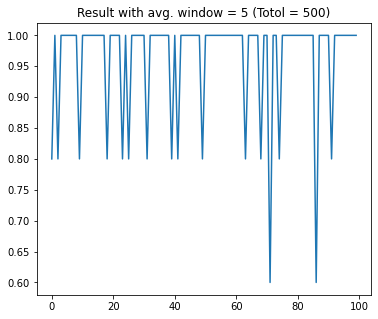

In [29]:
def res_plot(epi_res: List, window: int = 250) -> None:
    results = np.mean(np.array(epi_res).reshape(-1,window), axis=1)
    fig, axes = plt.subplots(figsize=(6, 5))
    axes.plot(results)
    axes.set_title('Result with avg. window = {} (Totol = {})'.format(window, len(epi_res)))
    
epi_res = res_info['res']
res_plot(epi_res, window=5)

# 2 TicTacToe with DQN

In [30]:
# std
import io
import sys
import random
import logging
from collections import namedtuple, deque

# imported
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

- a feedforward neural net with three hidden layers consisting of 128, 256, and 128 neurons
- input: 9 poition x 2 possible states
- output: nine actions

## 2.0 Implementation details

### Setup

In [31]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000
GAMMA = 0.99 # discount factor
TARGET_UPDATE = 500 # update interval
START_LR = 5e-4
EPS_MAX = 0.8
EPS_MIN = 0.1
N_STAR = 20000

### Utility

In [58]:
def grid_to_state(
    grid: np.array, 
    switch: bool = False, 
    vec: bool = True,
) -> np.array:
    """If not switched, 1 and -1 on the grid means X and O, and vice versa"""
    
    state = np.zeros((3, 3, 2))
    
    if not switch:
        state[:, :, 0] = (grid==1).astype(float)
        state[:, :, 1] = (grid==-1).astype(float)
    else:
        state[:, :, 0] = (grid==-1).astype(float)
        state[:, :, 1] = (grid==1).astype(float)
    
    if vec:
        state = state.reshape(1,-1)
    
    return torch.tensor(state, dtype=torch.float)

In [59]:
grid, _, _ = env.reset()
grid, _, _ = env.step(2)
grid, _, _ = env.step(3)
grid, _, _ = env.step(5)
print(grid)
test_state1 = grid_to_state(grid, vec=False)
# print(test_state1[:,:,0], test_state1[:,:,1])
test_state2 = grid_to_state(grid, switch=True, vec=False)
# print(test_state2[:,:,0], test_state2[:,:,1])
assert np.array_equal(test_state1[:,:,0], test_state2[:,:,1])
assert np.array_equal(test_state2[:,:,0], test_state1[:,:,1])

[[ 0.  0.  1.]
 [-1.  0.  1.]
 [ 0.  0.  0.]]


In [61]:
test_state2

tensor([[[0., 0.],
         [0., 0.],
         [0., 1.]],

        [[1., 0.],
         [0., 0.],
         [0., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

### Replay memory

- `Transition`: a single transition in our environment. It essentially maps (state, action) pairs to their (next_state, reward) result, with the state being the board position (showing -, O, or X)
- `ReplayMemory`: a cyclic buffer of bounded size that holds the transitions observed recently, which could be sampled for selecting a random batch of transitions for training

In [34]:
# ref: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#replay-memory
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

### Illegal moves reward (TODO)

In [35]:
R_UNAV = -1
# invalid = env.check_valid(position) == False

### DQN algorithm

- input state $s_t$ by a 3 × 3 × 2 tensor
- 2 hidden layers each with 128 neurons – with ReLu activation functions.
The output layer has 9 neurons (for 9 different actions) with linear activation functions
- 9 neurons (for 9 different actions) with linear activation functions

PS: do not constraint actions to only available actions. However, whenever the agent takes an unavailable action, we end the game and give the agent a negative reward
of value $r_{unav}$ = −1.

In [36]:
class DQN(nn.Module):

    def __init__(self, n_inputs: int = 18, n_outputs: int = 9):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, n_outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization.
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def act(self, state):
        with torch.no_grad():
            return self.forward(state).max(1)[1].view(1, 1)

In [37]:
def optimize_model(
    device: torch.device,
    optimizer: optim.Optimizer,
    criterion: torch.nn,
    policy: nn.Module,
    target: nn.Module,
    memory: ReplayMemory,
    batch_size: int,
    gamma: float,
):
    """Model optimization step, borrow from the Torch DQN tutorial.
    
    Arguments:
        device {torch.device} -- Device
        optimizer {torch.optim.Optimizer} -- Optimizer
        criterion {torch.nn} -- Loss
        policy {nn.Module} -- Policy net
        target {nn.Module} -- Target net
        memory {ReplayMemory} -- Replay memory
        batch_size {int} -- Number of observations to use per batch step
        gamma {float} -- Reward discount factor
    """
    if len(memory) < batch_size:
        return
    transitions = memory.sample(batch_size)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(
        tuple(map(lambda s: s is not None, batch.next_state)),
        device=device,
        dtype=torch.bool,
    )
    non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy
    state_action_values = policy(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(batch_size, device=device)
    next_state_values[non_final_mask] = target(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * gamma) + reward_batch

    # Compute Huber loss
    loss = criterion(
        state_action_values, 
        expected_state_action_values.unsqueeze(1)
    )

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

In [38]:
def decreasing_exploration(
    n_step: int,
    n_star: int = 20000, 
    e_max: float = 0.8, 
    e_min: float = 0.1, 
):
    return max(e_min, e_max * (1 - n_step/n_star)) 

In [42]:
def select_action(
    eps: float,
    policy_net: nn.Module, 
    state: np.array, 
    device: torch.device, 
    nr_action: int = 9,
) -> Tuple[torch.tensor, bool]:

    if random.random() > eps:
        return policy_net.act(state), False
    else:
        return (
            torch.tensor(
                [[random.randrange(9)]],
                device=device,
            ),
            True,
        )

In [102]:
def fit(
    n_episode: int = 20000,
    batch_size: int = BATCH_SIZE,
    buffer_size: int = BUFFER_SIZE,
    gamma: float = GAMMA,
    target_update: int = TARGET_UPDATE,
    explore: bool = False,
    n_star: int = N_STAR, 
    e_max: float = EPS_MAX, 
    e_min: float = EPS_MIN, 
    lr: float = START_LR,
    logging_size = 2000,
    seed = None,
) -> bytes:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    logging.info("Beginning training on: {}".format(device))
    
    # Network
    policy = DQN(n_inputs = 18, n_outputs = 9).to(device)
    target = DQN(n_inputs = 18, n_outputs = 9).to(device)
    target.load_state_dict(policy.state_dict())
    target.eval()

    # Adam optimizer
    optimizer = optim.Adam(policy.parameters(), lr=lr)
    
    # TODO: scheduler?

    # Huber loss (delte=1 in SmoothL1Loss)
    criterion = nn.SmoothL1Loss()

    # Memory buffer
    memory = ReplayMemory(BUFFER_SIZE)

    env = TictactoeEnv()
    # state = torch.tensor([], dtype=torch.float).to(device)
    summary = {
        "total": 0,
        "ties": 0,
        "illegals": 0,
        "wins": 0,
        "loss": 0,
        "win_rate": 0.0,
    }
    summaries = []
    
    # Expert
    expert = OptimalPlayer(epsilon=.5)

    for episode in tqdm(range(n_episode)):
        grid, end, _ = env.reset()
        
        if explore:
            eps = decreasing_exploration(episode, n_star, e_max, e_min)
        else:
            eps = e_max
        
        switch = episode % 2
        if switch:
            player1, player2 = 'O', 'X'
        else:
            player1, player2 = 'X', 'O'
        expert.player = player2
        
        # Take first step by expert
        if env.num_step == 0 and switch:
            move = expert.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
            
        while not end:
            # Select and perform an action from DQN
            state = grid_to_state(grid, switch=switch, vec=True).to(device)
            action, _ = select_action(eps, policy, state, device)
            if env.check_valid(action.item()):
                grid, end, winner = env.step(action.item(), print_grid=False)
                reward = env.reward(player=player1)
            else:
                reward = R_UNAV # -1
                end = True
                summary["illegals"] += 1
                winner = player2
                # print(episode, "Illegal moves")
                
            if not end:
                move = expert.act(grid)
                grid, end, winner = env.step(move, print_grid=False) 
                # Observe new state
                next_state = grid_to_state(grid, switch=switch, vec=True).to(device)
            else:
                next_state = None
                
            memory.push(state, action, next_state, torch.tensor([reward], device=device))

            optimize_model(
                device=device,
                optimizer=optimizer,
                criterion = criterion,
                policy=policy,
                target=target,
                memory=memory,
                batch_size=batch_size,
                gamma=gamma,
            )
            
        # update summary
        summary['total'] = episode + 1
        if winner == None:
            summary['ties'] += 1
        elif winner == player1:
            summary['wins'] += 1
        else:
            summary['loss'] += 1
        summary['win_rate'] = summary['wins'] / summary['total']
        
        if episode % target_update == 0:
            target.load_state_dict(policy.state_dict())
        if episode % logging_size == 0:
            print(summary)
#             if summaries != []:
#                 old_summary = summaries[-1]
#                 delta_summary = {k: summary[k] - old_summary[k] for k in old_summary}
#                 logging.info("{} : {}".format(episode, delta_summary))
                
#             summaries.append(summary)

    logging.info("Complete")

#     res = io.BytesIO()
#     torch.save(policy.state_dict(), res)

#     return res.getbuffer()

In [103]:
logging.basicConfig(level=logging.DEBUG)
fit(n_episode=20000, e_max=0.2)
# res = fit(n_episode=200)
# sys.stdout.write(res)

INFO:root:Beginning training on: cuda
  0%|          | 29/20000 [00:00<01:12, 277.20it/s]

{'total': 1, 'ties': 0, 'illegals': 1, 'wins': 0, 'loss': 1, 'win_rate': 0.0}


 10%|█         | 2014/20000 [00:26<03:58, 75.52it/s]

{'total': 2001, 'ties': 52, 'illegals': 467, 'wins': 562, 'loss': 1387, 'win_rate': 0.28085957021489255}


 20%|██        | 4015/20000 [00:52<03:37, 73.51it/s]

{'total': 4001, 'ties': 103, 'illegals': 862, 'wins': 1201, 'loss': 2697, 'win_rate': 0.30017495626093477}


 30%|███       | 6011/20000 [01:19<03:10, 73.54it/s]

{'total': 6001, 'ties': 138, 'illegals': 1268, 'wins': 1759, 'loss': 4104, 'win_rate': 0.29311781369771706}


 40%|████      | 8015/20000 [01:47<02:43, 73.09it/s]

{'total': 8001, 'ties': 158, 'illegals': 1640, 'wins': 2270, 'loss': 5573, 'win_rate': 0.2837145356830396}


 50%|█████     | 10007/20000 [02:15<02:17, 72.49it/s]

{'total': 10001, 'ties': 186, 'illegals': 2055, 'wins': 2700, 'loss': 7115, 'win_rate': 0.26997300269973}


 60%|██████    | 12009/20000 [02:44<01:58, 67.55it/s]

{'total': 12001, 'ties': 214, 'illegals': 2475, 'wins': 3175, 'loss': 8612, 'win_rate': 0.2645612865594534}


 70%|███████   | 14012/20000 [03:11<01:21, 73.24it/s]

{'total': 14001, 'ties': 232, 'illegals': 2877, 'wins': 3669, 'loss': 10100, 'win_rate': 0.2620527105206771}


 80%|████████  | 16013/20000 [03:41<00:56, 70.04it/s]

{'total': 16001, 'ties': 263, 'illegals': 3288, 'wins': 4164, 'loss': 11574, 'win_rate': 0.26023373539153805}


 90%|█████████ | 18012/20000 [04:09<00:27, 71.86it/s]

{'total': 18001, 'ties': 306, 'illegals': 3678, 'wins': 4674, 'loss': 13021, 'win_rate': 0.25965224154213656}


100%|██████████| 20000/20000 [04:36<00:00, 72.35it/s]
INFO:root:Complete


In [104]:
class DQNPlayer():
    def __init__(self, device: torch.device, player='X'):
        self.player = player # 'X' or 'O'
        self.device = device
        self.model = DQN(n_inputs=18, n_outputs=9).to(self.device)
        
    def load_model(self, path: str):
        model_state_dict = torch.load(path, map_location=self.device)
        self.model.load_state_dict(model_state_dict)
        self.model.eval()

    def act(self, state: torch.tensor):
        with torch.no_grad():
            p = F.softmax(self.model.forward(state)).cpu().numpy()
            valid_moves = (state.cpu().numpy().reshape(3,3,2).argmax(axis=2).reshape(-1) == 0)
            p = valid_moves*p
            return p.argmax()

## 2.1 Learning from experts

### Q11 Standard training with fixed  $\epsilon$ 

### Q12 Training without the replay buffer and with a batch size of 1

### Q13 Training with decreasing $\epsilon$ given different values of $n*$

### Q14 Visualizing $M_{opt}$ and $M_{rand}$ over time

### Q15 Reporting best results

## 2.2 Learning by self-practice

### Q16 Training with different fixed  $\epsilon$

### Q17 Training with decreasing  $\epsilon$ given different values of $n*$

### Q18 Reporting best results

### Q19 Visualizing Q values